# 2.3: Model [M3] (Neural Networks): *fill-this-in* (25 points)



### 2.3.1: Hyper-parameters

Define hyper-parameters for your method here

In [12]:
#
#
# ------- Your Code -------
#
#
batch_size_train = 100 
batch_size_test = 100
n_epochs = 30 
# other parameters ...
learning_rate = 2e-3
input_size=1
hidden_layers=[32,64,128]
drop_prob=0.3
num_classes=10
reg=0.001
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr        

### 2.3.2: Data Preprocessing


In [8]:
#
#
# ------- Your Code -------
#
# e.g. normalize, flatten input data.
transform = transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
train_set = torchvision.datasets.MNIST(root='.', train=True, transform=transform, download=True)
train_set, valid_set = torch.utils.data.random_split(train_set, [50000, 10000])
test_set = torchvision.datasets.MNIST(root='.', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size_train,
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=valid_set,
                                           batch_size=batch_size_train,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                          batch_size=batch_size_test,
                                          shuffle=False)

In [9]:
len(train_loader)

500

### 2.3.3: Model

Define your model here

In [10]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(drop_prob)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(64 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 64 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output  # return x for visualization

### 2.2.4: Fit Model


In [9]:
#
#
# ------- Your Code -------
#
# Example: net = Net(), ....
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model = Net(input_size, hidden_layers, num_classes).to(device)
model.apply(weights_init)
running_loss = 0.0
loss_plot_y = []
loss_plot_x =[]
loss_plot_val_y = []
loss_plot_val_x =[]
lr = learning_rate
learning_rate_decay = 0.95
accuracy_plot = []
total_step = len(train_loader)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)
for epoch in range(n_epochs):
        model.train()
        for (i, (images, labels)) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if (i + 1) % 50 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch
                        + 1, n_epochs, i + 1, total_step, loss.item()))
        loss_plot_y.append(running_loss / len(train_loader))
                #loss_plot_x.append(epoch * total_step + i)
        running_loss = 0.0
        loss_plot_x.append(epoch)
        lr *= learning_rate_decay
        update_lr(optimizer, lr)
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for (images, labels) in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                (_, predicted) = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                loss = criterion(outputs, labels)
                running_loss += loss.item()
            loss_plot_val_y.append(running_loss / len(val_loader))
            accuracy_plot.append(100 * correct / total)

            print('Validation accuracy is: {} %'.format(100 * correct / total))
        running_loss=0.0

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for (images, labels) in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        (_, predicted) = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


    print ('Accuracy of the network on the test images: {} %'.format(
            100 * correct / total))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/30], Step [50/500], Loss: 0.3832
Epoch [1/30], Step [100/500], Loss: 0.1175
Epoch [1/30], Step [150/500], Loss: 0.0407
Epoch [1/30], Step [200/500], Loss: 0.1327
Epoch [1/30], Step [250/500], Loss: 0.0626
Epoch [1/30], Step [300/500], Loss: 0.1273
Epoch [1/30], Step [350/500], Loss: 0.0274
Epoch [1/30], Step [400/500], Loss: 0.0479
Epoch [1/30], Step [450/500], Loss: 0.0311
Epoch [1/30], Step [500/500], Loss: 0.0374
Validation accuracy is: 97.52 %
Epoch [2/30], Step [50/500], Loss: 0.0790
Epoch [2/30], Step [100/500], Loss: 0.0517
Epoch [2/30], Step [150/500], Loss: 0.0536
Epoch [2/30], Step [200/500], Loss: 0.0183
Epoch [2/30], Step [250/500], Loss: 0.0525
Epoch [2/30], Step [300/500], Loss: 0.0407
Epoch [2/30], Step [350/500], Loss: 0.0824
Epoch [2/30], Step [400/500], Loss: 0.1178
Epoch [2/30], Step [450/500], Loss: 0.0604
Epoch [2/30], Step [500/500], Loss: 0.0701
Validation accuracy is: 98.48 %
Epoch [3/30], Step [50/500], Loss: 0.0773
Epoch [3/30], Step [100/500], Loss: 

In [10]:
torch.save(model.state_dict(), "model.pth")

### 2.2.5: Evaluation

Evaluate your model.

  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model

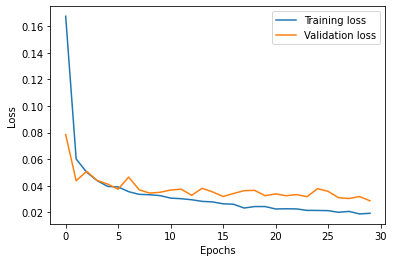

In [11]:
# Here plot epoch (# passes over training data) and loss
#
# ------- Your Code -------
#
plt.plot(loss_plot_x,loss_plot_y, label="Training loss")
plt.plot(loss_plot_x,loss_plot_val_y, label="Validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

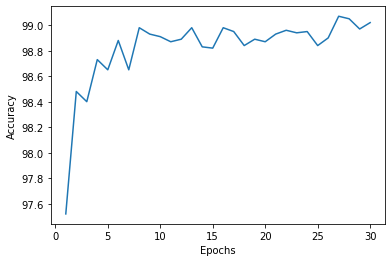

In [12]:
# Here plot epoch and accuracy over val/test set
#
# ------- Your Code -------
#
plt.plot(np.arange(1,len(accuracy_plot)+1,1),accuracy_plot)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [14]:
#
#
# ------- Your Code -------
# Example:
model = Net(input_size, hidden_layers, num_classes).to(device)
model.load_state_dict(torch.load("model.pth", map_location=torch.device('cpu')))

<All keys matched successfully>

In [15]:
# Here report the score for the best model
#
# ------- Your Code -------
#
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for (images, labels) in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        (_, predicted) = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


    print ('Accuracy of the network on the test images: {} %'.format(
            100 * correct / total))

Accuracy of the network on the test images: 99.16 %


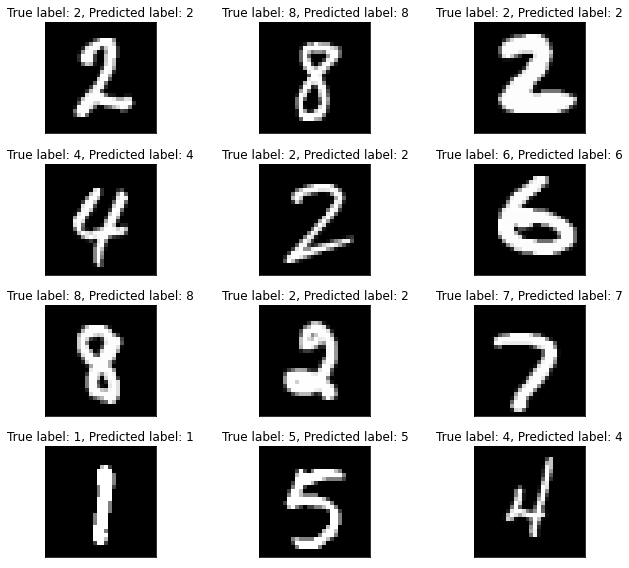

In [16]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
#
#
# ------- Your Code -------
#
predicted_arr = []
labels_arr = []
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for (images, labels) in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        (_, predicted) = torch.max(outputs.data, 1)
        predicted_arr.extend(predicted.cpu().numpy().tolist())
        labels_arr.extend(labels.cpu().numpy().tolist())

x_test_np = torch.flatten(test_loader.dataset.data, start_dim=1, end_dim=2).numpy()
vis_predictions(x_test_np, labels_arr, predicted_arr, len(predicted_arr))